**Step 1: Load Libraries & Dataset**

**1.1 – Import essential libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# for pretty plots
sns.set(style="whitegrid")

**1.2 – Load your dataset**

In [2]:
# Path to CSV
data_path = "../data/raw/mental_health_in_tech.csv"

# Load dataset
df = pd.read_csv(data_path)

# Show shape and preview
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


**Step 2: Initial Exploration**

**2.1 – Overview of data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**2.2 – Check for missing values**

In [4]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
Gender                          0
Timestamp                       0
Age                             0
family_history                  0
treatment                       0
no_employees                    0
Country                         0
remote_work                     0
tech_company                    0
care_options                    0
benefits                        0
seek_help                       0
anonymity                       0
leave                           0
wellness_program                0
mental_health_consequence       0
phys_health_consequence         0
supervisor                      0
coworkers                       0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
dtype: int64

**2.3 – Basic stats for numerical columns**

In [5]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


**2.4 – Check unique values in categorical columns**

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} unique values")

Timestamp: 1246 unique values
Gender: 49 unique values
Country: 48 unique values
state: 45 unique values
self_employed: 2 unique values
family_history: 2 unique values
treatment: 2 unique values
work_interfere: 4 unique values
no_employees: 6 unique values
remote_work: 2 unique values
tech_company: 2 unique values
benefits: 3 unique values
care_options: 3 unique values
wellness_program: 3 unique values
seek_help: 3 unique values
anonymity: 3 unique values
leave: 5 unique values
mental_health_consequence: 3 unique values
phys_health_consequence: 3 unique values
coworkers: 3 unique values
supervisor: 3 unique values
mental_health_interview: 3 unique values
phys_health_interview: 3 unique values
mental_vs_physical: 3 unique values
obs_consequence: 2 unique values
comments: 160 unique values


In [7]:
import os
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

**Step 3: Visual EDA (Meaningful Insights)**

**3.1 – Plot Target Distribution (treatment)**

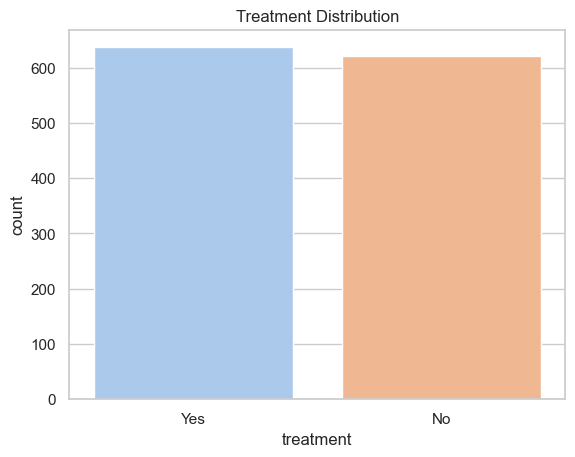

In [8]:
sns.countplot(data=df, x="treatment", palette="pastel")
plt.title("Treatment Distribution")
plt.show()

**3.2 – Gender Distribution**

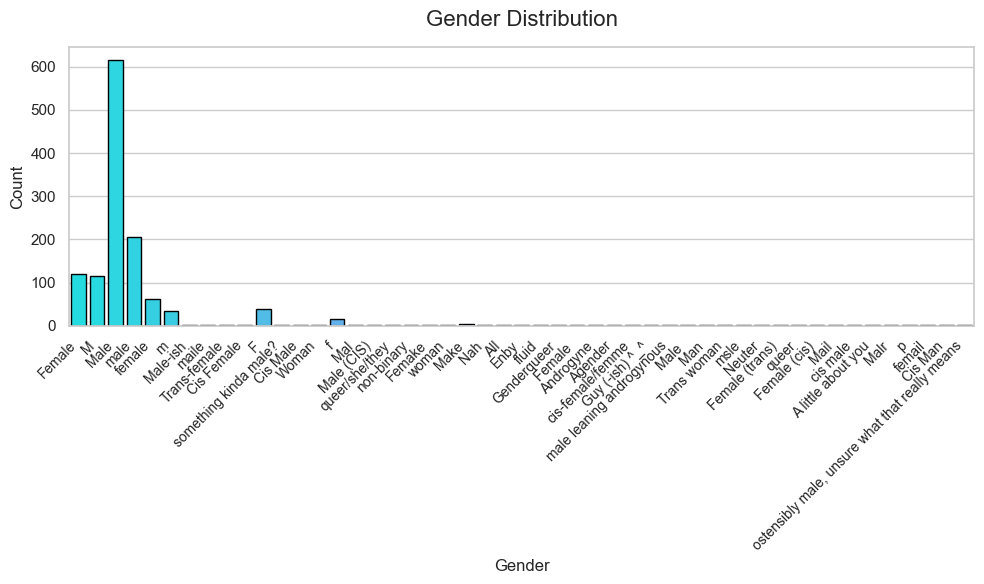

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Gender", palette="cool", edgecolor="black")
plt.title("Gender Distribution", fontsize=16, pad=15)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**3.3 – Age Distribution**

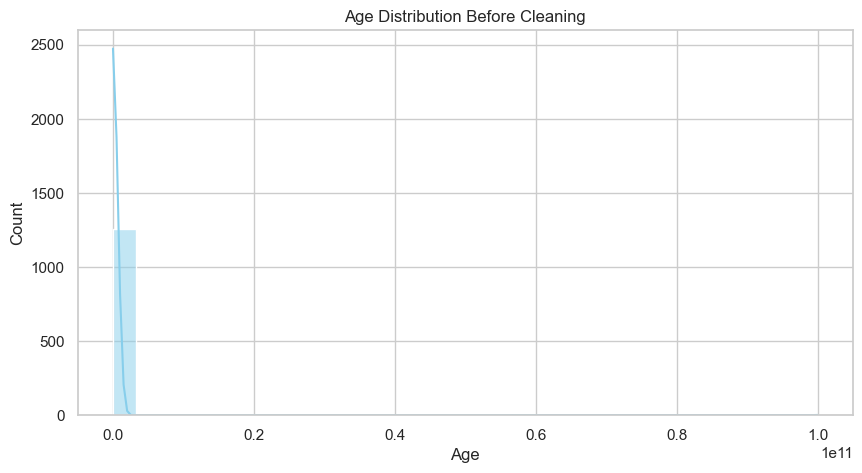

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution Before Cleaning")
plt.show()

**3.4 – Age Distribution (with outlier removal)**

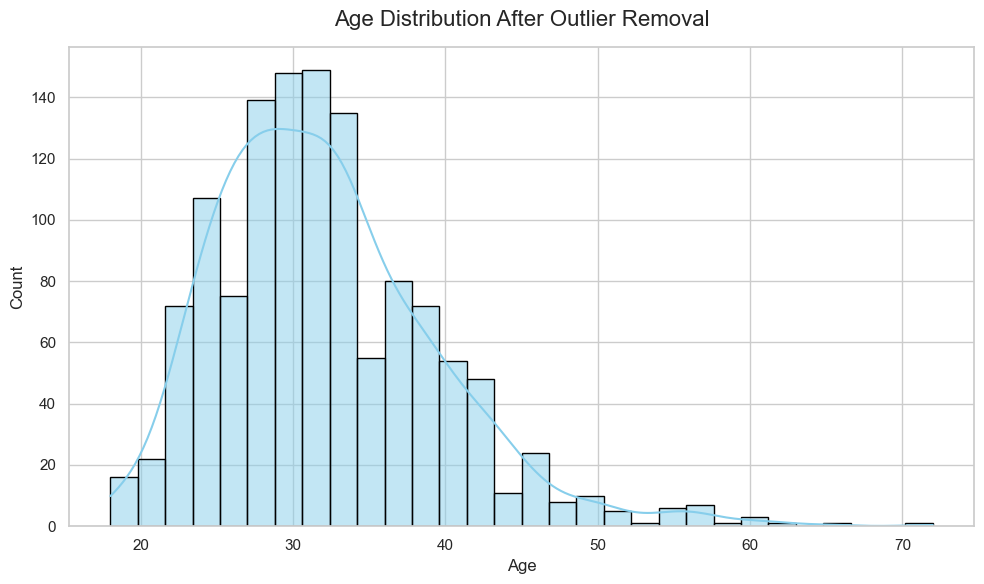

In [11]:
# Remove outliers (keep ages between 16 and 80)
df = df[(df['Age'] >= 16) & (df['Age'] <= 80)]

# Create a larger figure for better visibility
plt.figure(figsize=(10, 6))

# Plot Age distribution after outlier removal
sns.histplot(data=df, x="Age", bins=30, kde=True, color="skyblue", edgecolor="black")

# Customize title and labels
plt.title("Age Distribution After Outlier Removal", fontsize=16, pad=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjust layout to prevent cutoff
plt.tight_layout()

# Show plot
plt.show()

**3.5 – Mental Health vs Remote Work**

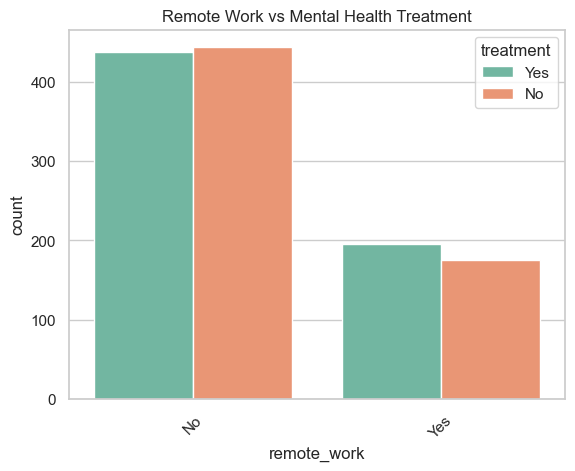

In [12]:
sns.countplot(data=df, x="remote_work", hue="treatment", palette="Set2")
plt.title("Remote Work vs Mental Health Treatment")
plt.xticks(rotation=45)
plt.show()

**Step 4: Cleaning & Encoding**

**4.1 – Clean Gender Column**

In [13]:
df['Gender'].unique()
def clean_gender(g):
    g = str(g).lower()
    if 'male' in g or g in ['m', 'man', 'cis male', 'male-ish']:
        return 'Male'
    elif 'female' in g or g in ['f', 'woman', 'cis female', 'femail']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)
# Double-check cleaned genders
df['Gender'].value_counts()

Gender
Male      1170
Female      58
Other       23
Name: count, dtype: int64

**4.2 – Handle Missing Values**

In [14]:
#Check again:
df.isnull().sum().sort_values(ascending=False)

#Drop columns with too many nulls (like 'comments'):
df.drop(['comments'], axis=1, inplace=True)

#For important columns: Fill missing
df['self_employed'].fillna('No', inplace=True)
df['work_interfere'].fillna('Don’t know', inplace=True)

**4.3 – Encode Target Variable**

In [15]:
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

**4.4 – Encode Categorical Features**

In [16]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


**4.5 – Final Check Before Modeling**

In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Timestamp                  1251 non-null   int64
 1   Age                        1251 non-null   int64
 2   Gender                     1251 non-null   int64
 3   Country                    1251 non-null   int64
 4   state                      1251 non-null   int64
 5   self_employed              1251 non-null   int64
 6   family_history             1251 non-null   int64
 7   treatment                  1251 non-null   int64
 8   work_interfere             1251 non-null   int64
 9   no_employees               1251 non-null   int64
 10  remote_work                1251 non-null   int64
 11  tech_company               1251 non-null   int64
 12  benefits                   1251 non-null   int64
 13  care_options               1251 non-null   int64
 14  wellness_program           12

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,37,1,44,10,0,0,1,2,4,...,2,2,1,1,1,2,1,0,2,0
1,1,44,1,44,11,0,0,0,3,5,...,0,0,0,1,0,0,1,1,0,0
2,2,32,1,6,45,0,0,0,3,4,...,0,1,1,1,2,2,2,2,1,0
3,3,31,1,43,45,0,1,1,2,2,...,1,1,2,2,1,0,0,0,1,1
4,4,31,1,44,37,0,0,0,1,1,...,0,0,1,1,1,2,2,2,0,0


**4.6 – Saving Clean Dataset to ../data/cleaned**

In [18]:
# Save cleaned dataset
output_path = "mental-health-viz/notebook/mental_health_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

OSError: Cannot save file into a non-existent directory: 'mental-health-viz\notebook'